# We Import all of the libraries we need

In [12]:
import sys

In [13]:
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install regex

In [91]:
import numpy as np
import pandas as pd
import re
import seaborn as sns

## We open the csv file

In [92]:
df = pd.read_csv('csvfile.csv',error_bad_lines=False, warn_bad_lines=False)

## We change the name

In [93]:
df.rename(columns = {'The Deep Space Nine Transcripts - What You Leave Behind':'TEST'}, inplace = True) 

## We make the csv file a table with rows and columns

In [94]:
df1= df["TEST"].str.split(":", n = 1, expand = True)

## Change the name of the columns

In [95]:
df1.columns = ["Person", "Line"]

## Remove all rows with none

In [97]:
df1 = df1.replace(to_replace='None', value=np.nan).dropna()

## We remove all spaces before and after the names

In [98]:
df1.Person = df1.Person.str.rstrip()

In [99]:
df1.columns = df1.columns.str.lstrip()
df1.Person.unique()

array(['Stardate', 'COMPUTER', 'EZRI', 'BASHIR', 'KEIKO', "O'BRIEN",
       'MOLLY', 'SISKO', 'KASIDY', 'JAKE', 'WORF', 'NOG', 'WEYOUN', 'GOR',
       'FOUNDER', 'BROCA', "JEM'HADAR", 'GARAK', 'BREEN', 'KIRA', 'DAMAR',
       'ENGINEER', 'ODO', 'SARAH', 'WINN', 'DUKAT', 'QUARK', 'VIC',
       'MILA', 'MARTOK', 'ROSS', 'EKOOR', 'CARDASSIAN', 'CARDASSIANS'],
      dtype=object)

In [100]:
df1["Person"] = df1["Person"].str.lower()
df1["Line"] = df1["Line"].str.lower()
df1.head(20)

,Person,Line
2,stardate,
6,computer,doctor bashir. the time is oh five
8,ezri,julian.
9,bashir,yes.
10,ezri,we have to get up.
11,bashir,are you sure?
12,ezri,it's a big day.
13,bashir,it was a big night. it cleared up a lot of un...
15,ezri,such as?
16,bashir,such as just how far these spots really go do...


In [102]:
!{sys.executable} -m pip install squarify
import matplotlib.pyplot as plt
import squarify

In [106]:
df1['words'] = [len(x.split()) for x in df1['Line'].tolist()]
df1

,Person,Line,words
2,stardate,,0
6,computer,doctor bashir. the time is oh five,7
8,ezri,julian.,1
9,bashir,yes.,1
10,ezri,we have to get up.,5
...,...,...,...
843,quark,what are you talking about?,5
845,quark,fifteen days! can i bring my own pillow?,8
846,kira,quark.,1
847,quark,it's clear. it's clear.,4


In [107]:
df2 = df1.groupby("Person")["words"].sum().reset_index()
df2

,Person,words
0,bashir,187
1,breen,0
2,broca,64
3,cardassian,3
4,cardassians,4
5,computer,10
6,damar,101
7,dukat,167
8,ekoor,20
9,engineer,4


In [110]:

df2

,Person,words
0,bashir,187
1,breen,0
2,broca,64
3,cardassian,3
4,cardassians,4
5,computer,10
6,damar,101
7,dukat,167
8,ekoor,20
9,engineer,4


ZeroDivisionError: float division by zero

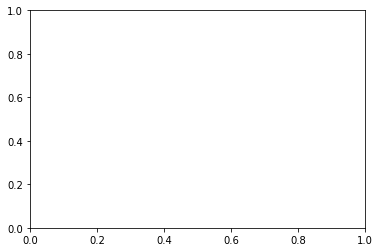

In [109]:
squarify.plot(sizes=df2['words'], label=df2['Person'], alpha=.8 )
plt.axis('off')
plt.show()